# 일별 수익률의 개념과 분포

필요한 모듈을 불러온다. pandas_datareader로 주가 데이터를 불러올 수 있다. 

In [ ]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

예시 데이터로 구글을 사용했다. 기간은 2010년 1월 1일부터 오늘까지. 

<AxesSubplot:xlabel='Date'>

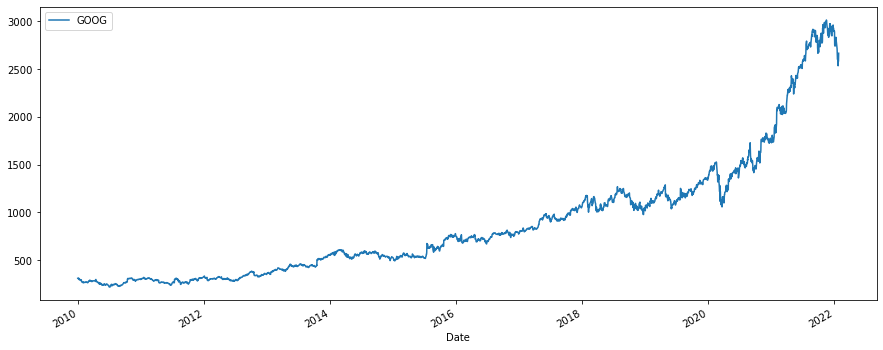

In [ ]:
ticker = 'GOOG'
data = pd.DataFrame()
data[ticker] = wb.DataReader(ticker, data_source = 'yahoo', start = '2010-1-1')['Adj Close']
#Plot
data.plot(figsize=(15,6))

Text(9.965555555555554, 0.5, 'Frequency')

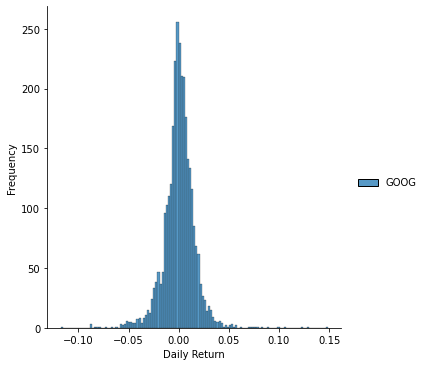

In [ ]:
log_returns = np.log(1 + data.pct_change())
#Plot
sns.displot(log_returns.iloc[1:])
plt.xlabel("Daily Return")
plt.ylabel("Frequency")

비교를 위해 정규분포도 같이 그린다. norm.fit는 Maximum Likelihood Estimation을 사용해서 해당 데이터의 평균, 분산을 구한다. 
강의 내용처럼 일별 수익률은 정규분포보다 뾰족하고, 꼬리 쪽 확률이 정규분포보다 높다(fat tail).

mu&std: 0.0007090318806171184 0.016225612606867754


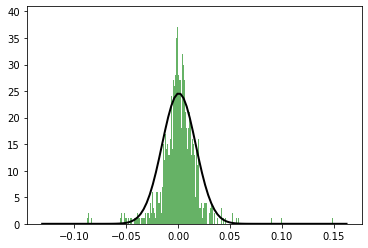

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

mu, std = norm.fit(log_returns[1:])

# Plot the histogram.
plt.hist(log_returns[1:], bins=1000, alpha=0.6, color='g')
# plt.plot(log_returns)

# # Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
print("mu&std:", mu, std)
plt.show()